In [37]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [3]:
#path to csv files and merge
mouse_metadata = pd.read_csv("../Resources/Mouse_metadata.csv")
study_results = pd.read_csv("../Resources/Study_results.csv")
mouse_study = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")
mouse_study.tail()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4
1892,z969,Naftisol,Male,9,30,45,73.867845,4


In [4]:
#display number of unique mice IDs
mouse_study["Mouse ID"].nunique()

249

In [5]:
#check for any mouse ID with duplicate time points
mouse_study["Mouse ID"].value_counts()

g989    13
n364    10
y793    10
g296    10
k894    10
        ..
v199     1
d133     1
n482     1
t573     1
h428     1
Name: Mouse ID, Length: 249, dtype: int64

In [6]:
#display the data associated with duplicate mouse ID
new_index = mouse_study.set_index("Mouse ID")
new_index.loc["g989", :]

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [7]:
#create a new DataFrame where this data is removed
remove_dup = new_index.drop(["g989"])
remove_dup

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [8]:
#display new number of unique mouse IDs
clean_df = remove_dup.reset_index()
clean_df["Mouse ID"].nunique()

248

In [36]:
#display summary statistics for each drug regimen
mean = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
SEM = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary = pd.DataFrame({
    "Mean": mean,
    "Median": median,
    "Variance": variance,
    "Standard Deviation": std,
    "SEM": SEM
})

summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [75]:
#Pandas bar chart to show the total number of time points for all mice tested for each drug regimen throughout the study
points_df = clean_df.groupby("Drug Regimen")["Timepoint"].count()
points_df

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

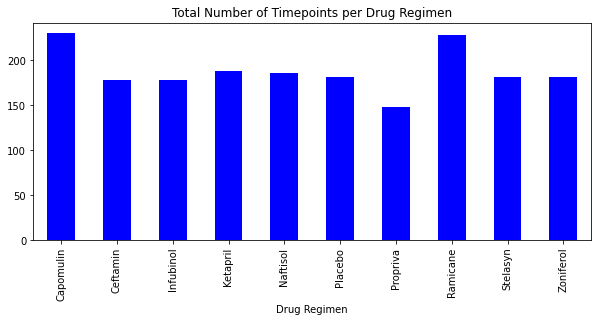

In [82]:
points_df.plot(kind="bar", facecolor="blue", figsize=(10,4), 
               title="Total Number of Timepoints per Drug Regimen", 
               x="Drug Regimen",
               y="Total Number of Timepoints")

                               
plt.show()